# Aufgabe 1 (2P)
Laden Sie den Datensatz
‚herford_weather.csv‘ . Er entstammt der
Open Meteo Api und enthält
WeBerdaten zur LokaDon Herford.

## a)
Formen Sie den Datensatz in eine
Zeitreihe um, indem Sie den
Zeitstempel in einen Date Time –
Datentyp dtype('<M8[ns]‘)
umformen und als Index setzen.
Erzeugen Sie den folgenden
DataFrame (mind. Ansicht der
ersten 5 Zeilen und Spalten ) und
zeichnen Sie ein Liniendiagramm
für die Temperaturwerte in 2m
über dem Boden (1)

<img src="images/1a0.png" width="600"> <img src="images/1a1.png" width="600">

datetime64[ns]


,temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),apparent_temperature (°C),pressure_msl (hPa),surface_pressure (hPa),precipitation (mm),rain (mm),snowfall (cm),weathercode (wmo code),...,et0_fao_evapotranspiration (mm),vapor_pressure_deficit (kPa),soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³)
Date Time,,,,,,,,,,,,,,,,,,,,,
1996-01-01 00:00:00,-2.3,80,-5.3,-7.2,1003.4,988.2,0.0,0.0,0.0,3,...,0.01,0.11,-1.7,-0.5,2.3,7.8,0.36,0.364,0.346,0.34
1996-01-01 01:00:00,-2.1,80,-5.2,-7.0,1003.8,988.6,0.0,0.0,0.0,3,...,0.01,0.11,-1.7,-0.5,2.3,7.8,0.36,0.364,0.346,0.34
1996-01-01 02:00:00,-2.0,79,-5.2,-6.9,1003.9,988.7,0.0,0.0,0.0,3,...,0.01,0.11,-1.7,-0.5,2.3,7.8,0.36,0.364,0.346,0.34
1996-01-01 03:00:00,-2.1,79,-5.3,-7.0,1004.0,988.8,0.0,0.0,0.0,3,...,0.01,0.11,-1.7,-0.5,2.3,7.8,0.36,0.364,0.346,0.34
1996-01-01 04:00:00,-2.2,78,-5.5,-7.1,1004.5,989.3,0.0,0.0,0.0,3,...,0.01,0.12,-1.7,-0.5,2.3,7.8,0.36,0.364,0.346,0.34


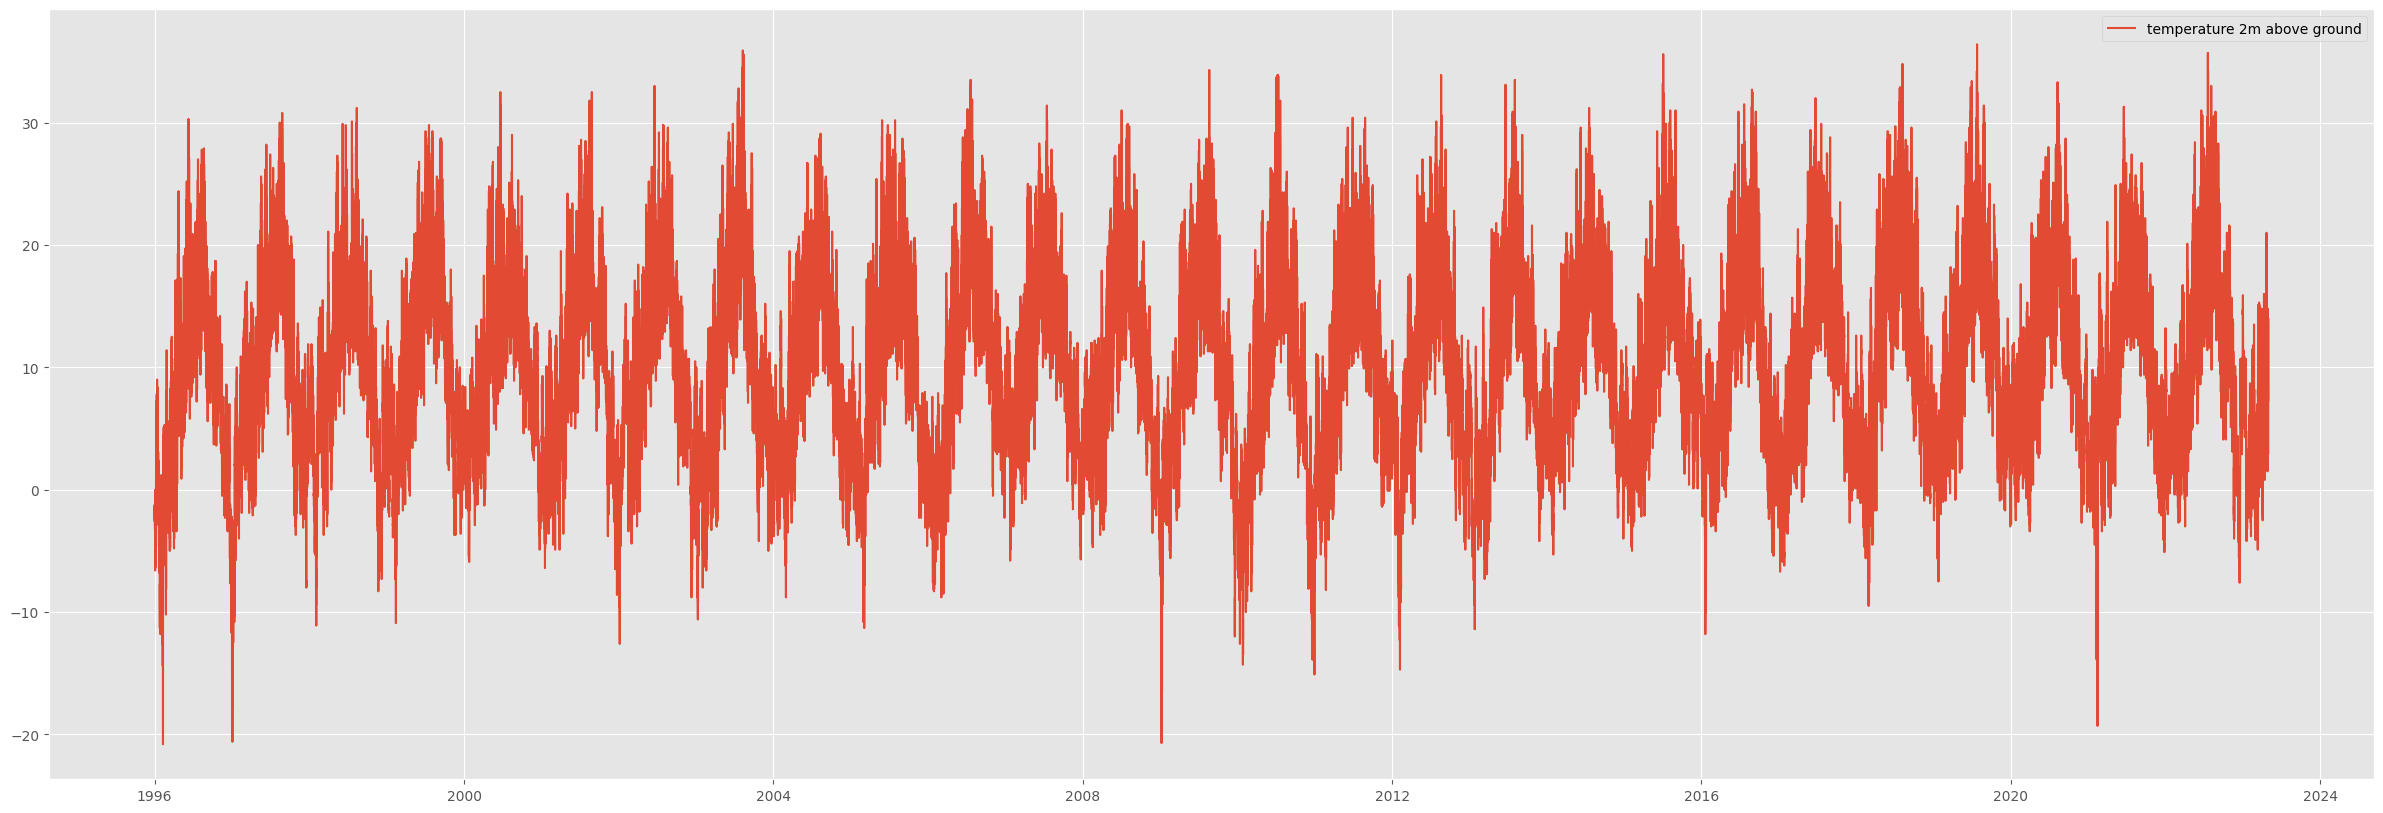

In [168]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('herford_weather.csv', parse_dates=True, index_col=0,)
df.index.name = 'Date Time'
# datetime64[ns] == <M8[ns] if machine uses little endian
# datetime64[ns] == >M8[ns] if machine uses big endian
df.index = pd.to_datetime(df.index)

print(df.index.dtype)

plt.figure(figsize=(30,10))
plt.plot(df['temperature_2m (°C)'], label='temperature 2m above ground')
plt.legend()

df.head()

## b)
Erzeugen Sie einen
Datensatz, der nur die
täglichen Mittelwerte für
2022 enthält (Abb oben) und
stellen Sie wieder die
Temperatur in 2 m
Bodenhöhe einmal für
stündliche Werte (links) und
einmal für die täglichen
Mittelwerte(rechts) dar. (1P)

<img src="images/1b0.png" width="1200">
<img src="images/1b1.png" width="1200">

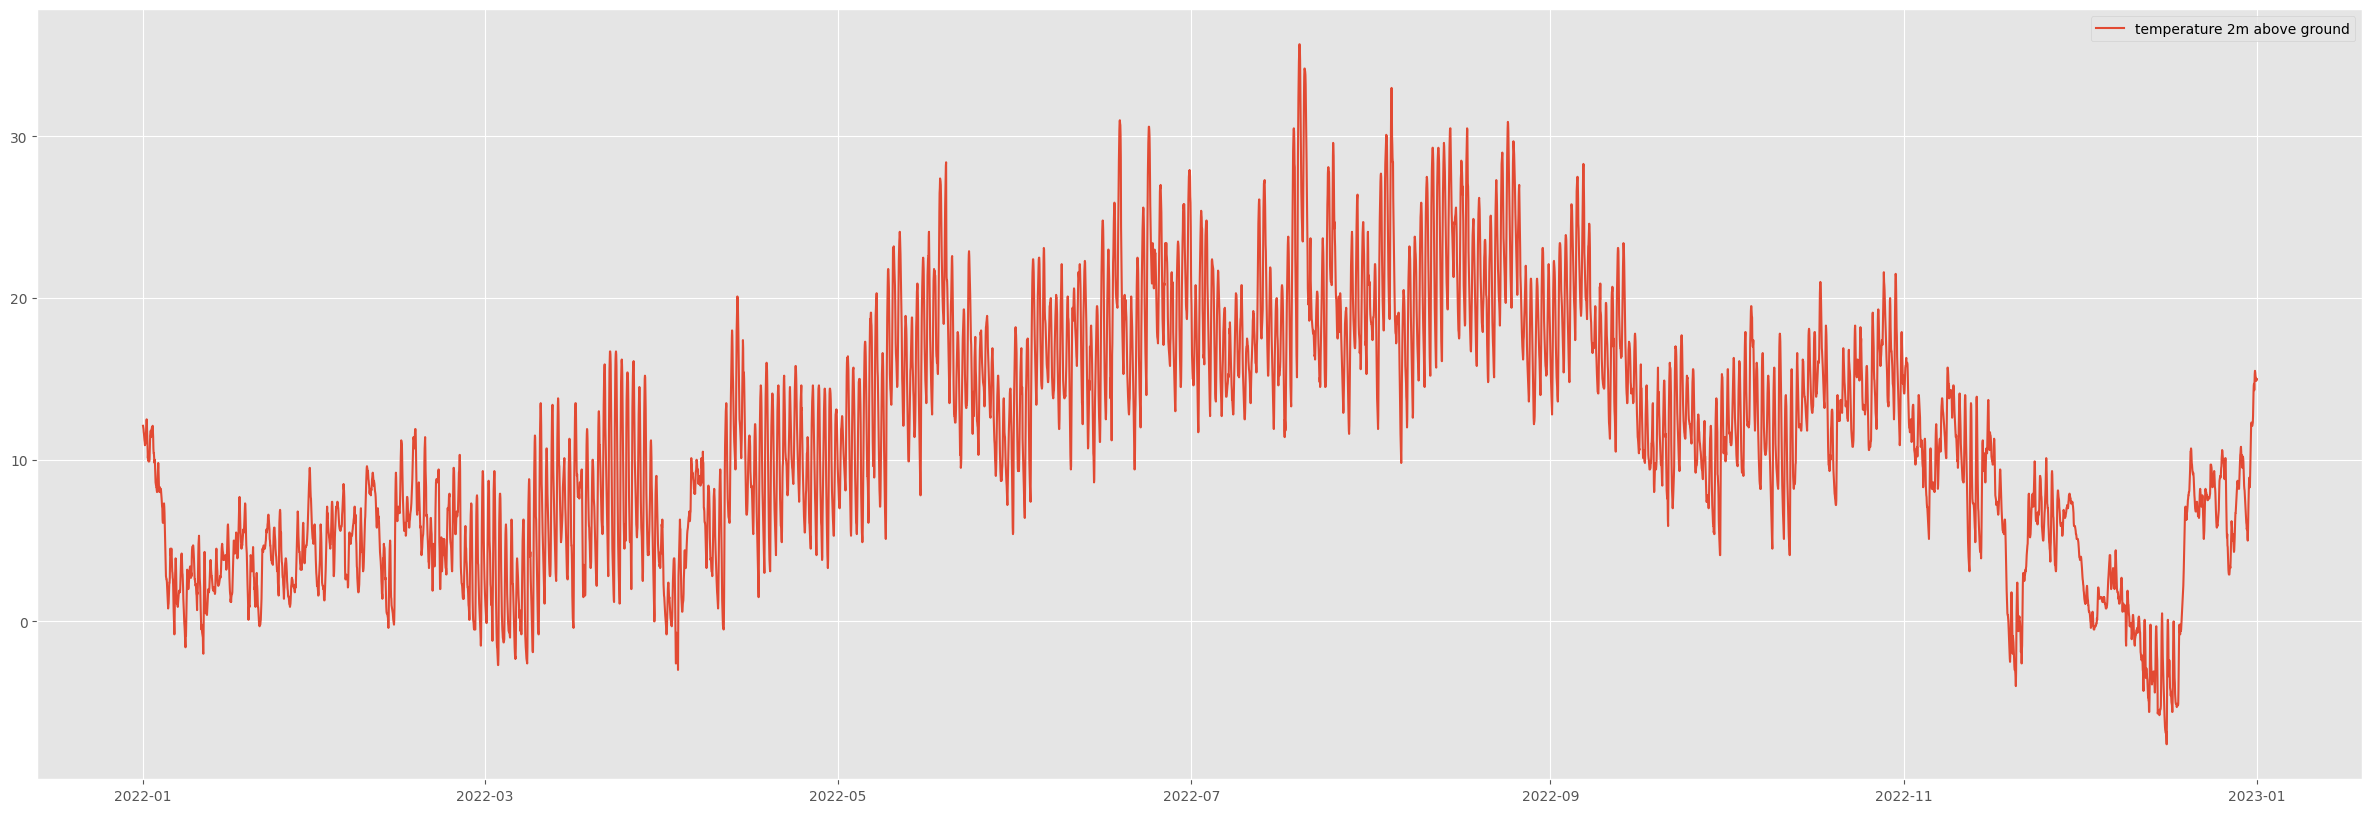

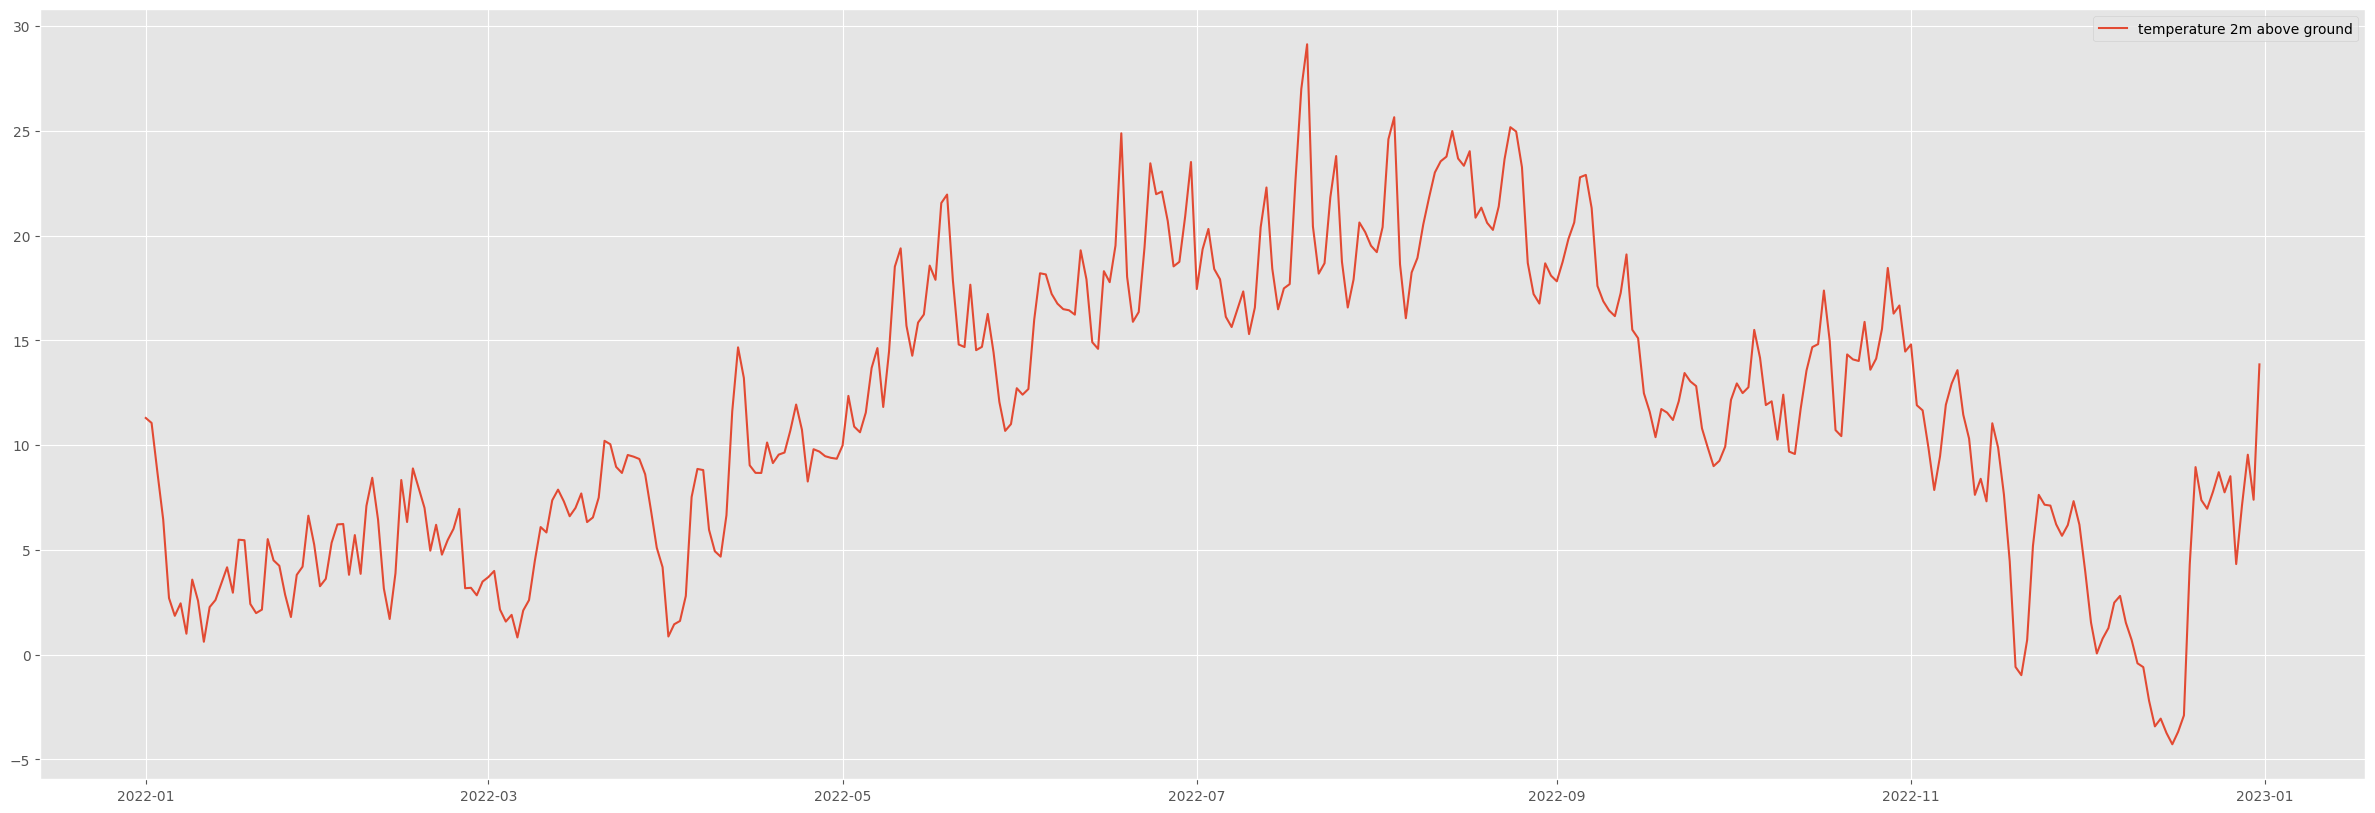

,temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),apparent_temperature (°C),pressure_msl (hPa),surface_pressure (hPa),precipitation (mm),rain (mm),snowfall (cm),weathercode (wmo code),...,et0_fao_evapotranspiration (mm),vapor_pressure_deficit (kPa),soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³)
Date Time,,,,,,,,,,,,,,,,,,,,,
2022-01-01,11.295833,92.875000,10.175000,9.137500,1022.158333,1007.420833,0.000000,0.000000,0.0000,2.625000,...,0.012917,0.096667,9.662500,8.908333,6.187500,8.900000,0.401792,0.409458,0.397667,0.368958
2022-01-02,11.058333,83.458333,8.329167,7.545833,1012.791667,998.195833,0.208333,0.208333,0.0000,31.041667,...,0.032917,0.221667,9.116667,8.579167,6.700000,8.800000,0.403083,0.404583,0.398583,0.369417
2022-01-03,8.708333,87.833333,6.787500,4.333333,1007.704167,993.050000,0.316667,0.316667,0.0000,38.125000,...,0.022083,0.138750,8.037500,8.154167,7.066667,8.800000,0.415000,0.418750,0.400917,0.370042
2022-01-04,6.445833,91.750000,5.187500,3.116667,997.429167,982.812500,0.087500,0.087500,0.0000,34.958333,...,0.012917,0.081667,6.591667,7.266667,7.258333,8.745833,0.406250,0.411792,0.403417,0.371000
2022-01-05,2.695833,90.916667,1.358333,-2.308333,1000.745833,985.883333,0.170833,0.145833,0.0175,27.916667,...,0.011667,0.067083,3.675000,5.212500,7.175000,8.700000,0.404458,0.407542,0.404000,0.371875


In [169]:
# df.drop(index=df.index[df.index.year != 2022], inplace=True)
# alt.
df = df['2022-01-01':'2022-12-31']

plt.figure(figsize=(30,10))
plt.plot(df['temperature_2m (°C)'], label='temperature 2m above ground')
plt.legend()
plt.show()

plt.figure(figsize=(30,10))
df_only_days = df.resample('D').mean()
plt.plot(df_only_days['temperature_2m (°C)'], label='temperature 2m above ground')
plt.legend()
plt.show()

df_only_days.head()



# Aufgabe 2 (2P)
Benutzen Sie wieder die gleiche Datei
‚herford_weather.csv‘ wie in Aufgabe 1.
## a) Zeichnen Sie ein Liniendiagramm für die stündlichen
Werte der Temperatur in 2m über dem Erdboden am
1.August 2022 (siehe Abb) 0.5P

<img src="images/2a0.png" width="600">

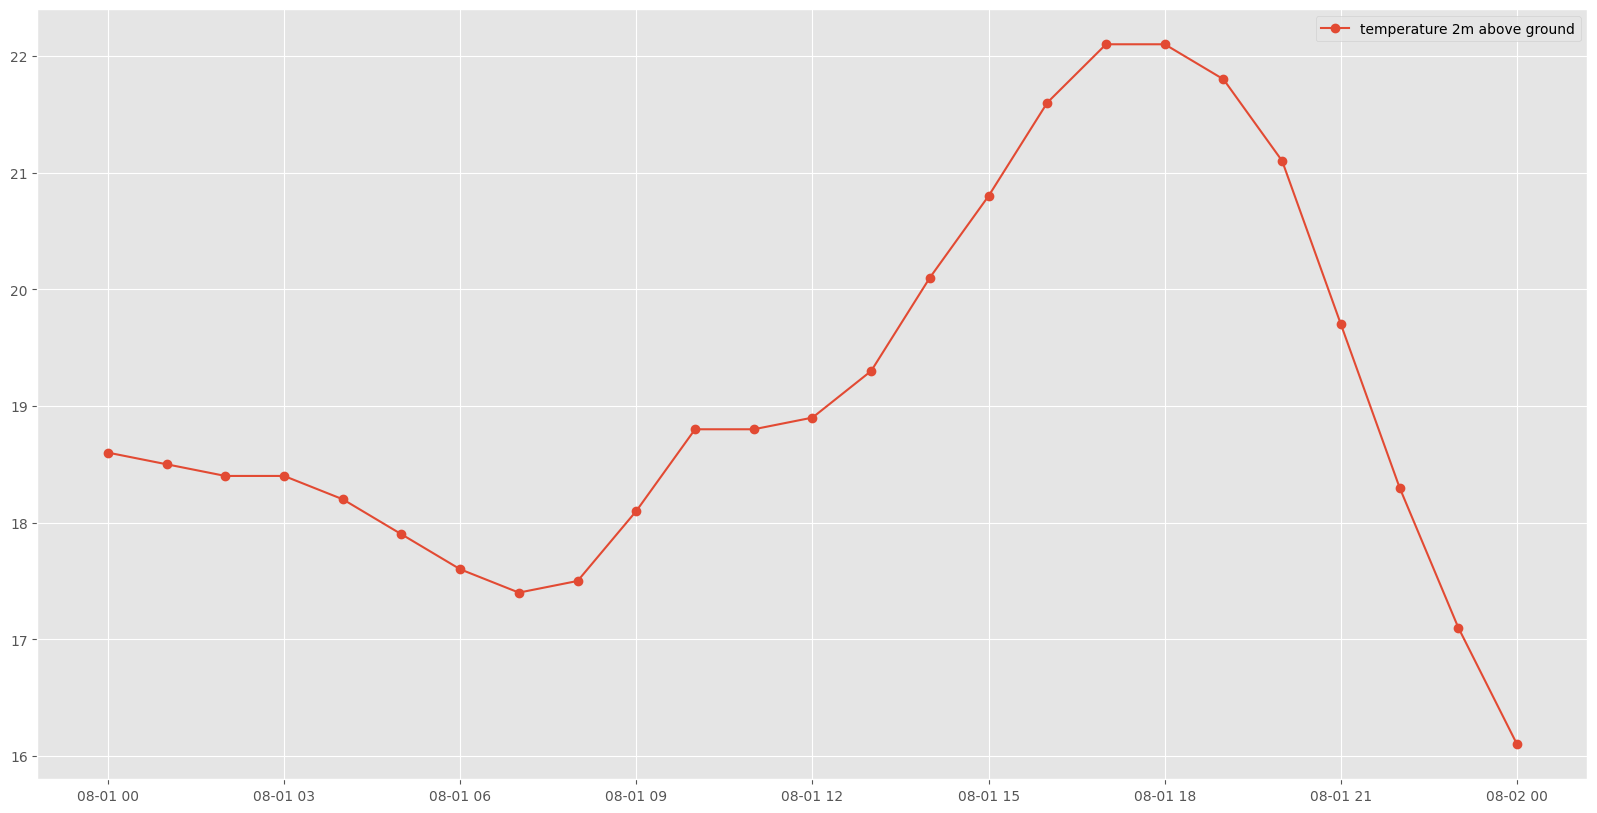

,temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),apparent_temperature (°C),pressure_msl (hPa),surface_pressure (hPa),precipitation (mm),rain (mm),snowfall (cm),weathercode (wmo code),...,et0_fao_evapotranspiration (mm),vapor_pressure_deficit (kPa),soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³)
Date Time,,,,,,,,,,,,,,,,,,,,,
2022-08-01 00:00:00,18.6,95,17.7,19.5,1013.9,999.7,0.2,0.2,0.0,51,...,0.0,0.12,19.0,19.7,17.9,14.2,0.336,0.245,0.23,0.351
2022-08-01 01:00:00,18.5,93,17.4,19.1,1014.3,1000.0,0.1,0.1,0.0,51,...,0.0,0.14,18.8,19.6,17.9,14.2,0.336,0.245,0.23,0.351
2022-08-01 02:00:00,18.4,93,17.3,18.8,1014.3,1000.0,0.0,0.0,0.0,3,...,0.0,0.15,18.6,19.5,17.9,14.2,0.335,0.246,0.23,0.351
2022-08-01 03:00:00,18.4,93,17.3,18.9,1014.3,1000.0,0.0,0.0,0.0,3,...,0.0,0.14,18.5,19.4,17.9,14.2,0.334,0.246,0.23,0.351
2022-08-01 04:00:00,18.2,94,17.3,18.7,1014.5,1000.2,0.1,0.1,0.0,51,...,0.0,0.12,18.5,19.3,17.9,14.2,0.333,0.247,0.23,0.351


In [170]:
df = df['2022-08-01':'2022-08-02 00:00:00']

plt.plot(df['temperature_2m (°C)'], label='temperature 2m above ground', marker='o')
plt.legend()
plt.show()

df.head()

## b)
Entfernen Sie den Wert für 18:00 Uhr aus der Datei und
zeichnen Sie wieder ein Liniendiagramm (siehe Abb.)
0.5P

<img src="images/2b0.png" width="600">

## c)
Füllen Sie den fehlenden Wert mit dem globalen
Mittelwert vom 1. August auf und visualisieren Sie das
Ergebnis (siehe Abb) 0.5P

<img src="images/2c0.png" width="600">

## d)
Füllen Sie den fehlendeb Wert jetzt mit dem Lag 1.
Ordnung auf und zeichnen Sie wieder ein Liniendiagramm
(siehe Abb.) , Erklären Sie den Unterschied! 0.5P

<img src="images/2d0.png" width="600">

# Aufgabe 3 (1P)
GläBung durch gleitende MiBelwerte: GläBen Sie nun mit der rolling-Methode in der gleichen Datei wie in Aufgabe 1 und 2 die
stündlichen Temperaturwerte für den Zeitraum vom 1.Juni 2022 bis zum 3. Juni 2022. Erzeugen Sie Diagramme ähnlich der unten
abgebildeten (links: ohne GläBung, rechts mit GläBung). (1P)

<img src="images/3_0.png" width="1200">